In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

ModuleNotFoundError: No module named 'numpy'

In [19]:
# ----------------------------
# 1. Load LFW Dataset
# ----------------------------
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.5, color=True)
print("Image shape:", lfw.images.shape)   # (n_samples, h, w, 3)
print("Classes:", len(lfw.target_names))

# Pick 2 classes only for binary classification
persons = ["George W Bush", "Colin Powell"]
mask = np.isin(lfw.target, [np.where(lfw.target_names == p)[0][0] for p in persons])

X = lfw.images[mask]
y = lfw.target[mask]

# Encode labels (0 or 1)
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, num_classes=2)

# Normalize images
X = X / 255.0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Image shape: (1560, 62, 47, 3)
Classes: 12
Train shape: (612, 62, 47, 3) Test shape: (154, 62, 47, 3)


In [20]:
# ----------------------------
# 2. Build CNN Model
# ----------------------------
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=X_train.shape[1:]),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(2, activation="softmax")
])

model.compile(optimizer=Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 60, 45, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 8, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 486,850 (1.86 MB)

 Trainable params: 486,850 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# ----------------------------
# 3. Train Model
# ----------------------------
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.6848 - loss: 0.6318 - val_accuracy: 0.6623 - val_loss: 0.6391
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.6986 - loss: 0.6131 - val_accuracy: 0.6623 - val_loss: 0.6435
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.6892 - loss: 0.6265 - val_accuracy: 0.6623 - val_loss: 0.6412
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.6902 - loss: 0.6180 - val_accuracy: 0.6623 - val_loss: 0.6398
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.7029 - loss: 0.6142 - val_accuracy: 0.6623 - val_loss: 0.6409


In [23]:
# ----------------------------
# 4. Evaluate
# ----------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 66.23%


In [15]:
# ----------------------------
# 5. Evaluate Model
# ----------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 76.19%


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


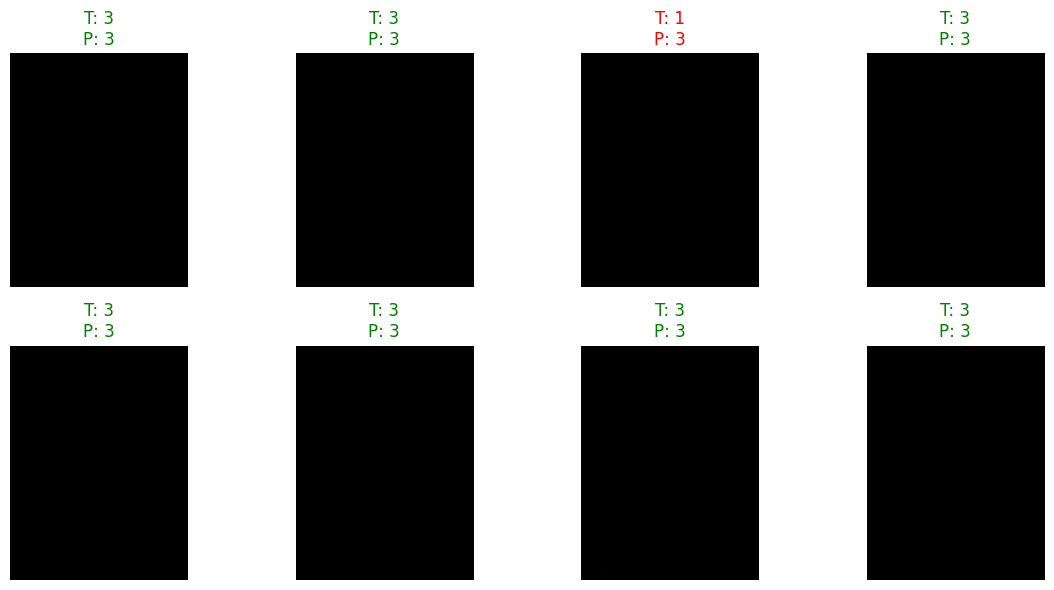

In [25]:
# ----------------------------
# 5. Show Predictions on Test Images
# ----------------------------
preds = model.predict(X_test)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Show 8 test samples
fig, axes = plt.subplots(2, 4, figsize=(12,6))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(X_test))
    ax.imshow(X_test[idx])
    ax.axis("off")
    true_label = le.inverse_transform([true_classes[idx]])[0]
    pred_label = le.inverse_transform([pred_classes[idx]])[0]
    color = "green" if true_label == pred_label else "red"
    ax.set_title(f"T: {true_label}\nP: {pred_label}", color=color)

plt.tight_layout()
plt.show()